


















# VLDB 2020 - Demo


## WoMG: a Library for Word-of-Mouth Cascades Generation































In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from womg import womg

### Definition of the inputs: graph as NetworkX instance and corpus as directory path. 

In [15]:
N = 100
g = nx.random_geometric_graph(N, .2)
docs_path = 'demo_corpus/'

prop = womg(graph=g, docs_path=docs_path, virality_resistance=12.5)

Formatting graph..



Creating interests..
Training LDA model..
Extracting topic distribution from docs in  demo_corpus/
Computing cascades.. 
WoMG diffusion has been completed.


### Main WoMG outputs: 
* bow of the documents,  
* topic distributions of the items, 
* interests of the nodes, 
* propagations.

In [ ]:
# bag of words of the propagating items (DOCS x WORDS)
prop.docs

In [ ]:
# topic distribution of the propagating items (TOPICS x DOCS)
prop.topic_distributions

In [ ]:
# interests for the nodes (TOPICS x NODES)
prop.interests

In [ ]:
# propagations (DOCS x (TIME, NODE))
prop.propagations

### Displaying the output with NetworkX

In [16]:
def plot_graph(g, node_color, cmap=None):
    NODE_SIZE = 600
    plt.figure(figsize=(8, 8))
    pos = nx.get_node_attributes(g, 'pos')
    nx.draw_networkx_edges(g, pos, alpha=0.4)
    nx.draw_networkx_nodes(g,
                           pos=pos,
                           node_size=NODE_SIZE,
                           alpha=1.0,
                           node_color=node_color,
                           cmap=cmap,
                           edgecolors='k')
    plt.axis('off')  

Firstly, we display the activated nodes

/Users/Cinus/miniconda3/envs/womg-test/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


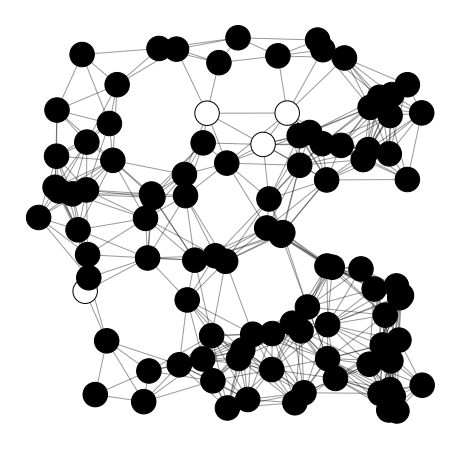

In [17]:
item = 0
activations = np.zeros(N)
for _time, node in prop.propagations[item]:
    activations[node] = 1
    
plot_graph(g, activations, plt.cm.binary)

Secondly, we plot the interest in the topic that best describes item 0: component 0 

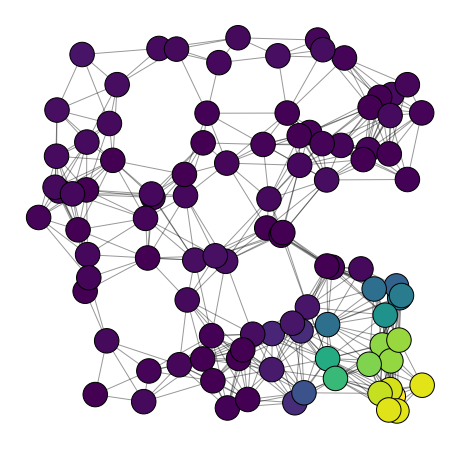

In [18]:
component = 0
plot_graph(g, prop.interests[component])

In [ ]:
?womg